# **Analisis Sentimen Ulasan ChatGPT**

Selamat datang dalam proyek *Analisis Sentimen Ulasan ChatGPT*!  
Di era digital yang berkembang pesat, ulasan pengguna memegang peranan penting dalam membentuk persepsi publik terhadap suatu produk atau layanan. Dalam proyek ini, kita akan mengeksplorasi dunia analisis sentimen untuk memahami bagaimana pengguna merasakan dan menyampaikan pendapat mereka mengenai penggunaan ChatGPT.

Analisis sentimen merupakan salah satu cabang penting dalam pemrosesan bahasa alami (Natural Language Processing/NLP), yang memungkinkan kita secara otomatis mengidentifikasi apakah suatu ulasan bernada positif, negatif, atau netral. Dengan demikian, proyek ini dapat membantu kita memahami umpan balik pengguna dengan lebih baik dan mendukung pengambilan keputusan dalam pengembangan serta peningkatan aplikasi.

Sepanjang proyek ini, kita akan mempelajari konsep-konsep utama dalam analisis sentimen, seperti pra-pemrosesan teks, ekstraksi fitur, serta penerapan model machine learning untuk memprediksi sentimen ulasan. Kita akan menggunakan bahasa pemrograman Python dan pustaka populer seperti NLTK, scikit-learn, dan TensorFlow.

Proyek ini tidak hanya akan memberikan wawasan yang mendalam tentang analisis sentimen, tetapi juga memperkuat keterampilan Anda dalam pemrograman dan pemrosesan data.  
Mari kita mulai petualangan ini dan ungkap sentimen di balik ulasan pengguna ChatGPT!


# **Import Library**

In [1]:
# Import Library Utama untuk Analisis Sentimen

import pandas as pd  # Manipulasi dan analisis data tabular
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chained assignment pada Pandas

import numpy as np  # Komputasi numerik dan pengaturan random seed
seed = 0
np.random.seed(seed)  # Menetapkan seed untuk memastikan hasil reproducible

import matplotlib.pyplot as plt  # Visualisasi dasar (plot, histogram, dsb)
import seaborn as sns  # Visualisasi statistik yang lebih menarik dan interaktif

from sklearn.metrics import accuracy_score, precision_score  # Mengukur performa model klasifikasi (akurasi & presisi)
from sklearn.feature_extraction.text import TfidfVectorizer  # Mengubah teks menjadi representasi numerik (fitur TF-IDF)
from sklearn.model_selection import train_test_split, GridSearchCV  # Membagi dataset & melakukan pencarian hyperparameter
from sklearn.naive_bayes import BernoulliNB  # Model klasifikasi Naive Bayes untuk fitur biner (TF-IDF bernilai 0/1)
from sklearn.ensemble import RandomForestClassifier # Model klasifikasi Random Forest
from sklearn.tree import DecisionTreeClassifier # Model klasifikasi Decision Tree
from sklearn.linear_model import LogisticRegression # Model Logistic Regression

import datetime as dt  # Manipulasi tanggal dan waktu (misalnya parsing atau ekstraksi informasi waktu)
import re  # Ekspresi reguler (regex) untuk membersihkan teks (misalnya menghapus URL, angka, simbol, dll.)
import string  # Mengakses karakter khusus seperti tanda baca (untuk pembersihan teks)

from nltk.tokenize import word_tokenize  # Tokenisasi kata (memecah kalimat menjadi kata-kata)
from nltk.corpus import stopwords  # Kumpulan stopwords (kata umum yang diabaikan dalam analisis)

# Instalasi pustaka Sastrawi untuk stemming dan stopword Bahasa Indonesia (hanya perlu dijalankan sekali di awal)
!pip install sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Membuat objek stemmer untuk stemming Bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Membuat objek stopword remover untuk Bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi word cloud dari kumpulan kata (frekuensi kata)

import csv  # Untuk membaca dan menulis file CSV (jika ingin parsing atau simpan data tanpa Pandas)
import requests  # Untuk melakukan permintaan HTTP (misalnya mengambil data dari internet)
from io import StringIO  # Untuk menangani data teks sebagai objek file (berguna saat parsing respon dari web)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [2]:
import nltk  # Pustaka NLTK (Natural Language Toolkit) untuk pemrosesan bahasa alami

# Mengunduh resource yang diperlukan untuk analisis teks
nltk.download('punkt')  # Untuk tokenisasi kata/kalimat
nltk.download('stopwords')  # Untuk daftar kata-kata umum yang diabaikan
nltk.download('averaged_perceptron_tagger')  # Untuk POS tagging
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Loading Dataset

In [3]:
# Link Google Drive asli (view)
drive_url = "https://drive.google.com/file/d/1sDI5BRthRTMv24oY2GUvBtldSbUD_Wq8/view?usp=drive_link"

# Ubah menjadi direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
direct_download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Ambil data CSV menggunakan requests
response = requests.get(direct_download_url)

# Cek apakah berhasil
if response.status_code == 200:
    data = StringIO(response.text)
    df_ulasan = pd.read_csv(data)

    # Menampilkan info dataset
    print(f"Jumlah ulasan yang didapat: {df_ulasan.shape[0]}")
    print(f"Jumlah fitur (kolom) dalam data: {df_ulasan.shape[1]}")
    print(df_ulasan.head())
else:
    print("Gagal mengambil data. Status code:", response.status_code)

Jumlah ulasan yang didapat: 59142
Jumlah fitur (kolom) dalam data: 11
                               reviewId         userName  \
0  6f6c7e75-c845-47cf-a194-75d2280ca2db  Pengguna Google   
1  ef026234-dc01-46ad-ac7d-c39b210d4671  Pengguna Google   
2  4e80ffa0-f546-4697-b43d-3f2709c27974  Pengguna Google   
3  ef8cea73-45dd-4254-8d31-cd7a2a5e90d5  Pengguna Google   
4  aed12b48-1036-4e45-a16d-ce9d218510b9  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  aplikasinya udah bagus bangett bahkan terlalu ...      5            624   
1  Hasil visual matrix terlalu lama dan masih ter...      3              3  

In [4]:
# Menampilkan ringkasan informasi struktur DataFrame
df_ulasan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59142 entries, 0 to 59141
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              59142 non-null  object
 1   userName              59142 non-null  object
 2   userImage             59142 non-null  object
 3   content               59141 non-null  object
 4   score                 59142 non-null  int64 
 5   thumbsUpCount         59142 non-null  int64 
 6   reviewCreatedVersion  53363 non-null  object
 7   at                    59142 non-null  object
 8   replyContent          18 non-null     object
 9   repliedAt             18 non-null     object
 10  appVersion            53363 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.0+ MB


In [5]:
# Mengecek jumlah nilai kosong (missing/null) di setiap kolom dalam DataFrame
print(df_ulasan.isnull().sum())

reviewId                    0
userName                    0
userImage                   0
content                     1
score                       0
thumbsUpCount               0
reviewCreatedVersion     5779
at                          0
replyContent            59124
repliedAt               59124
appVersion               5779
dtype: int64


In [6]:
# Membuat DataFrame baru bernama 'clean_df' dengan menghapus kolom penting yang memiliki nilai kosong (NaN)
clean_df = df_ulasan.dropna(subset=['content', 'score'])

In [7]:
# Menampilkan ringkasan informasi struktur DataFrame 'clean_df'
# Digunakan untuk memverifikasi bahwa semua baris dengan nilai kosong (NaN) telah berhasil dihapus
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59141 entries, 0 to 59141
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              59141 non-null  object
 1   userName              59141 non-null  object
 2   userImage             59141 non-null  object
 3   content               59141 non-null  object
 4   score                 59141 non-null  int64 
 5   thumbsUpCount         59141 non-null  int64 
 6   reviewCreatedVersion  53362 non-null  object
 7   at                    59141 non-null  object
 8   replyContent          18 non-null     object
 9   repliedAt             18 non-null     object
 10  appVersion            53362 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.4+ MB


In [8]:
# Menampilkan jumlah baris (data) dalam DataFrame 'clean_df' setelah menghapus baris yang memiliki nilai kosong (NaN)
print(f"Jumlah data sebelum pembersihan: {df_ulasan.shape[0]}")
print(f"Jumlah data setelah pembersihan: {clean_df.shape[0]}")

Jumlah data sebelum pembersihan: 59142
Jumlah data setelah pembersihan: 59141


In [9]:
# Mengecek jumlah baris yang duplikat (identik seluruh kolom) dalam DataFrame 'df_ulasan'
print(f"Jumlah baris yang duplikat: {df_ulasan.duplicated().sum()}")

Jumlah baris yang duplikat: 0


##Preprocessing

Dalam proyek ini, beberapa fungsi digunakan untuk membersihkan dan memproses teks ulasan sebagai bagian dari tahap **pra-pemrosesan (preprocessing)** sebelum dilakukan analisis sentimen. Berikut adalah penjelasan setiap fungsi yang digunakan:

1. **`preprocess_text`**  
   Fungsi ini digunakan untuk membersihkan teks dari elemen-elemen yang tidak relevan, seperti:
   - Mention (`@username`)
   - Hashtag (`#tag`)
   - Teks "RT" (retweet)
   - Tautan atau link
   - Angka
   - Tanda baca  
   Selain itu, fungsi ini juga mengganti karakter newline (`\n`) dengan spasi dan menghapus spasi berlebih di awal dan akhir teks.

2. **`normalize_text(text)`**  
   Fungsi ini mengubah seluruh huruf dalam teks menjadi huruf kecil (*lowercase*). Tujuan dari proses ini adalah untuk menyamakan format kata sehingga menghindari duplikasi yang disebabkan oleh perbedaan kapitalisasi, misalnya "Saya" dan "saya" dianggap sebagai kata yang sama.

3. **`split_words(text)`**  
   Fungsi ini memecah teks menjadi unit-unit kata yang lebih kecil (*token*). Tokenisasi memudahkan analisis teks karena memungkinkan pengolahan kata-kata secara terpisah dan lebih detail.

4. **`remove_stopwords(tokens)`**  
   Fungsi ini digunakan untuk menghapus kata-kata yang tidak memiliki makna penting dalam analisis (*stopwords*), seperti kata-kata umum yang sering muncul dalam bahasa namun tidak memberikan informasi tambahan, seperti "dan", "yang", "di", dan sebagainya. Fungsi ini juga memungkinkan penambahan stopwords tambahan sesuai dengan kebutuhan analisis.

5. **`stem_text(text)`**  
   Fungsi ini mengubah kata-kata menjadi bentuk dasarnya (*stem*). Misalnya, kata-kata seperti "membaca", "dibaca", dan "bacaan" akan diubah menjadi bentuk dasar "baca". Proses ini menggunakan pustaka **Sastrawi**, yang dirancang khusus untuk Bahasa Indonesia.

6. **`join_words(tokens)`**  
   Fungsi ini menggabungkan kembali daftar token (kata-kata) menjadi satu kalimat utuh. Fungsi ini biasanya digunakan setelah proses *filtering* dan *stemming*, untuk menghasilkan teks yang lebih terstruktur dan siap untuk analisis lebih lanjut.

Keenam fungsi ini sangat penting untuk menghasilkan data teks yang lebih bersih, seragam, dan siap untuk dianalisis menggunakan teknik machine learning atau metode analisis sentimen lainnya.

In [10]:
# Fungsi untuk membersihkan teks dari karakter atau elemen yang tidak relevan
def preprocess_text(text):
    text = re.sub(r'@\w+', '', text)  # Hapus mention (@username)
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag (#hashtag)
    text = re.sub(r'RT\s+', '', text)  # Hapus retweet (RT)
    text = re.sub(r'http\S+', '', text)  # Hapus link
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'\W+', ' ', text)  # Hapus karakter non-huruf dan non-angka

    text = text.replace('\n', ' ')  # Ganti newline dengan spasi
    text = text.strip()  # Hapus spasi di awal dan akhir

    return text

# Mengubah seluruh teks menjadi huruf kecil (case folding)
def normalize_text(text):
    return text.lower()

# Melakukan tokenisasi: memecah kalimat menjadi daftar kata
def split_words(text):
    return word_tokenize(text)

# Menghapus stopwords dalam Bahasa Indonesia, Bahasa Inggris, dan tambahan kata umum tidak penting
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('indonesian')) | set(stopwords.words('english'))
    tambahan_stopwords = {'iya', 'yaa', 'gak', 'nya', 'sih', 'ku', 'di', 'ga', 'ya', 'loh', 'kah', 'woi', 'woy'}
    stop_words.update(tambahan_stopwords)

    return [word for word in tokens if word not in stop_words]

# Melakukan stemming Bahasa Indonesia: mengubah kata ke bentuk dasarnya
def stem_text(text):
    stemmer = StemmerFactory().create_stemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])

# Menggabungkan kembali token-token menjadi kalimat utuh (untuk disimpan/diproses lebih lanjut)
def join_words(tokens):
    return ' '.join(tokens)

In [11]:
slang_dict = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def replace_slang(text):
    # Pisahkan kata-kata dalam teks menggunakan regex untuk menangani tanda baca dengan benar
    words = re.findall(r'\b\w+\b', text)

    # Ganti kata slang dengan kata yang sesuai dari dictionary 'slangwords', jika ditemukan
    cleaned_words = [slang_dict.get(word.lower(), word) for word in words]

    return ' '.join(cleaned_words)

# Contoh penggunaan
text_sample = "Gojek beneran keren bgt! Mengantarkan di lokasi yang tepat, tapi kadang telat sampai dilokasi tujuan."
fixed_text = replace_slang(text_sample)
print(fixed_text)

Gojek beneran keren banget Mengantarkan di lokasi yang tepat tapi kadang terlambat sampai dilokasi tujuan


Kamus slang atau daftar kata-kata tidak baku dalam Bahasa Indonesia adalah kumpulan kata yang sering digunakan dalam komunikasi informal, beserta padanan kata baku yang lebih formal. Fungsi dari kamus slang ini antara lain:

1. **Memahami Makna Slang:**  
   Kamus slang membantu individu yang belum familiar dengan istilah atau ekspresi slang yang digunakan dalam kelompok tertentu, sehingga mereka bisa memahami makna kata-kata tersebut dengan lebih mudah.

2. **Memfasilitasi Komunikasi Informal:**  
   Slang banyak digunakan dalam percakapan santai, baik di media sosial maupun dalam interaksi sehari-hari. Kamus slang memungkinkan seseorang untuk menyesuaikan gaya bahasa dengan konteks informal agar lebih relevan dan mudah dipahami.

3. **Mengenal Budaya Populer:**  
   Istilah slang sering kali mencerminkan budaya populer dan tren yang sedang berkembang. Kamus slang membantu individu untuk mengikuti dan memahami dinamika bahasa yang berkaitan dengan konteks budaya tersebut.

4. **Mendukung Penulisan dan Karya Sastra:**  
   Dalam dunia tulis-menulis, penggunaan slang dapat memberikan nuansa lebih nyata dan mencerminkan karakter atau suasana dalam sebuah karya. Kamus slang memudahkan penulis dalam memilih kata yang lebih tepat sesuai dengan konteks narasi yang ingin dibangun.

5. **Sebagai Sarana Pembelajaran dan Hiburan:**  
   Bagi sebagian orang, mempelajari kata-kata slang bisa menjadi hal yang menyenangkan atau sekadar karena rasa ingin tahu terhadap kekayaan dan variasi bahasa yang digunakan dalam kehidupan sehari-hari.

Penting untuk diingat bahwa penggunaan slang sebaiknya disesuaikan dengan konteks dan audiens. Slang lebih cocok digunakan dalam situasi santai atau non-formal. Untuk komunikasi yang resmi atau profesional, sebaiknya tetap menggunakan bahasa yang baku dan formal.


In [12]:
# Menampilkan beberapa baris pertama dari DataFrame yang telah dibersihkan
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6f6c7e75-c845-47cf-a194-75d2280ca2db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasinya udah bagus bangett bahkan terlalu ...,5,624,1.2025.077,2025-03-29 12:41:19,NaN,NaN,1.2025.077
1,ef026234-dc01-46ad-ac7d-c39b210d4671,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hasil visual matrix terlalu lama dan masih ter...,3,3,1.2025.084,2025-04-09 00:10:22,NaN,NaN,1.2025.084
2,4e80ffa0-f546-4697-b43d-3f2709c27974,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sistem nya menjadi error dan tombol ""Pembuat U...",4,14,1.2025.077,2025-03-29 17:08:47,NaN,NaN,1.2025.077
3,ef8cea73-45dd-4254-8d31-cd7a2a5e90d5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Hallo gays menurut pribadiku ya, nih apk bagus...",3,46,1.2025.070,2025-03-19 21:49:14,NaN,NaN,1.2025.070
4,aed12b48-1036-4e45-a16d-ce9d218510b9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Maaf bgt kesannya jadi gimana,tapi udah terbia...",4,29,1.2025.084,2025-04-04 15:45:53,NaN,NaN,1.2025.084


In [13]:
# 1. Membersihkan teks dari karakter tidak penting
clean_df['text_clean'] = clean_df['content'].apply(preprocess_text)

# 2. Mengubah teks menjadi huruf kecil
clean_df['text_casefoldingText'] = clean_df['text_clean'].str.lower()

# 3. Mengganti kata-kata slang dengan kata baku
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(replace_slang)

# 4. Memecah teks menjadi token
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(word_tokenize)

# 5. Menghapus stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(lambda x: [word for word in x if word not in stop_words])

# 6. Menggabungkan token kembali menjadi kalimat
clean_df['text_akhir'] = clean_df['text_stopword'].apply(lambda x: ' '.join(x))

# Melihat hasilnya
clean_df[['content', 'text_akhir']].head()

,content,text_akhir
0,aplikasinya udah bagus bangett bahkan terlalu ...,aplikasinya bagus bangett sempurna valid akura...
1,Hasil visual matrix terlalu lama dan masih ter...,hasil visual matrix terbatas menunggu jam prod...
2,"Sistem nya menjadi error dan tombol ""Pembuat U...",sistem nya error tombol pembuat ulang nya hila...
3,"Hallo gays menurut pribadiku ya, nih apk bagus...",hallo gays pribadiku iya apk bagus ngobrol car...
4,"Maaf bgt kesannya jadi gimana,tapi udah terbia...",maaf banget kesannya terbiasa mode gratis phot...


In [14]:
# Menampilkan seluruh DataFrame
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,6f6c7e75-c845-47cf-a194-75d2280ca2db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasinya udah bagus bangett bahkan terlalu ...,5,624,1.2025.077,2025-03-29 12:41:19,NaN,NaN,1.2025.077,aplikasinya udah bagus bangett bahkan terlalu ...,aplikasinya udah bagus bangett bahkan terlalu ...,aplikasinya sudah bagus bangett bahkan terlalu...,"[aplikasinya, sudah, bagus, bangett, bahkan, t...","[aplikasinya, bagus, bangett, sempurna, valid,...",aplikasinya bagus bangett sempurna valid akura...
1,ef026234-dc01-46ad-ac7d-c39b210d4671,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hasil visual matrix terlalu lama dan masih ter...,3,3,1.2025.084,2025-04-09 00:10:22,NaN,NaN,1.2025.084,Hasil visual matrix terlalu lama dan masih ter...,hasil visual matrix terlalu lama dan masih ter...,hasil visual matrix terlalu lama dan masih ter...,"[hasil, visual, matrix, terlalu, lama, dan, ma...","[hasil, visual, matrix, terbatas, menunggu, ja...",hasil visual matrix terbatas menunggu jam prod...
2,4e80ffa0-f546-4697-b43d-3f2709c27974,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sistem nya menjadi error dan tombol ""Pembuat U...",4,14,1.2025.077,2025-03-29 17:08:47,NaN,NaN,1.2025.077,Sistem nya menjadi error dan tombol Pembuat Ul...,sistem nya menjadi error dan tombol pembuat ul...,sistem nya menjadi error dan tombol pembuat ul...,"[sistem, nya, menjadi, error, dan, tombol, pem...","[sistem, nya, error, tombol, pembuat, ulang, n...",sistem nya error tombol pembuat ulang nya hila...
3,ef8cea73-45dd-4254-8d31-cd7a2a5e90d5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Hallo gays menurut pribadiku ya, nih apk bagus...",3,46,1.2025.070,2025-03-19 21:49:14,NaN,NaN,1.2025.070,Hallo gays menurut pribadiku ya nih apk bagus ...,hallo gays menurut pribadiku ya nih apk bagus ...,hallo gays menurut pribadiku iya ini apk bagus...,"[hallo, gays, menurut, pribadiku, iya, ini, ap...","[hallo, gays, pribadiku, iya, apk, bagus, ngob...",hallo gays pribadiku iya apk bagus ngobrol car...
4,aed12b48-1036-4e45-a16d-ce9d218510b9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Maaf bgt kesannya jadi gimana,tapi udah terbia...",4,29,1.2025.084,2025-04-04 15:45:53,NaN,NaN,1.2025.084,Maaf bgt kesannya jadi gimana tapi udah terbia...,maaf bgt kesannya jadi gimana tapi udah terbia...,maaf banget kesannya jadi bagaimana tapi sudah...,"[maaf, banget, kesannya, jadi, bagaimana, tapi...","[maaf, banget, kesannya, terbiasa, mode, grati...",maaf banget kesannya terbiasa mode gratis phot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59137,9c4701d8-53f7-4a65-be34-168c3cde7315,Depan Ya,https://play-lh.googleusercontent.com/a/ACg8oc...,‚ù§Ô∏è,5,0,NaN,2024-12-20 09:37:11,NaN,NaN,NaN,ù Ô è,ù ô è,ù ô è,"[ù, ô, è]","[ù, ô, è]",ù ô è
59138,e04be3c4-bf8c-43fc-9cc6-68e58bb61bc5,Yerry Suwarna,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantap....,5,0,NaN,2024-12-22 13:22:10,NaN,NaN,NaN,Mantap,mantap,mantap,[mantap],[mantap],mantap
59139,62f767e4-5f76-4987-937f-157dd94a08b7,Fajri Ramadhan,https://play-lh.googleusercontent.com/a-/ALV-U...,üí©,1,0,NaN,2025-04-02 09:31:54,NaN,NaN,NaN,üí,üí,üí,[üí],[üí],üí
59140,72b10b05-fbfd-41fa-8df3-2774df3e6562,24. Nayla Qoni'atun Sholehah,https://play-lh.googleusercontent.com/a-/ALV-U...,üëé,1,0,NaN,2024-06-07 11:42:55,NaN,NaN,NaN,üëé,üëé,üëé,[üëé],[üëé],üëé


##Pelabelan

In [15]:
# Ambil Lexicon Positif
lexicon_positive = {}
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    csv_data = csv.reader(StringIO(response.text), delimiter=',')
    for word, score in csv_data:
        lexicon_positive[word] = int(score)
else:
    print("Gagal mengunduh data lexicon positif")

# Ambil Lexicon Negatif
lexicon_negative = {}
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    csv_data = csv.reader(StringIO(response.text), delimiter=',')
    for word, score in csv_data:
        lexicon_negative[word] = int(score)
else:
    print("Gagal mengunduh data lexicon negatif")

In [16]:
# Fungsi untuk melakukan analisis sentimen menggunakan lexicon positif dan negatif
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

In [17]:
# Analisis sentimen
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

# Hitung jumlah sentimen
sentiment_counts = clean_df['polarity'].value_counts()
print("Hasil jumlah sentimen:")
print(sentiment_counts)

Hasil jumlah sentimen:
polarity
positive    40584
neutral     13992
negative     4565
Name: count, dtype: int64


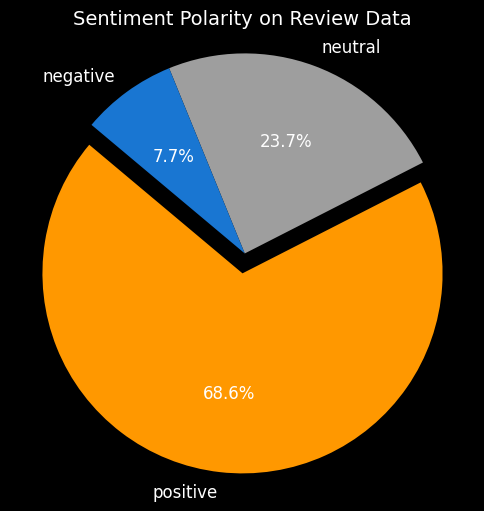

In [18]:
# Tentukan warna dan efek ledakan untuk pie chart
color_theme = {
    'positive': '#ff9800',
    'negative': '#1976d2',
    'neutral': '#9e9e9e'
}
colors = [color_theme.get(label, '#cccccc') for label in sentiment_counts.index]
explode = [0.1 if label == 'positive' else 0 for label in sentiment_counts.index]

# Pie chart
plt.style.use('dark_background')
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 12},
    explode=explode
)
plt.title('Sentiment Polarity on Review Data', fontsize=14)
plt.axis('equal')
plt.show()

## Eksplorasi Label

In [19]:
# Mengatur batas maksimum panjang teks yang ditampilkan di setiap kolom menjadi 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Menyaring data untuk mengambil hanya tweet yang memiliki sentimen positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Mengambil kolom-kolom yang relevan dari data tweet positif.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan tweet berdasarkan nilai skor polaritas tertinggi ke terendah.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame dari awal (mulai dari nol).
positive_tweets = positive_tweets.reset_index(drop=True)

# Menyesuaikan indeks agar dimulai dari angka 1.
positive_tweets.index += 1

In [20]:
# Menyesuaikan tampilan Pandas agar dapat memperlihatkan isi kolom hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Menyaring data untuk mendapatkan tweet dengan sentimen negatif saja.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Menyimpan hanya kolom-kolom yang dibutuhkan dari tweet negatif.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan data berdasarkan skor polaritas dari nilai terendah ke tertinggi.
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Mengambil 10 data teratas setelah pengurutan (tweet dengan polaritas paling negatif).
negative_tweets = negative_tweets[0:10]

# Mengatur ulang nomor indeks agar dimulai dari nol.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menyesuaikan indeks agar dimulai dari angka 1 untuk tampilan yang lebih rapi.
negative_tweets.index += 1

In [21]:
# Menyesuaikan pengaturan tampilan Pandas agar kolom dapat memuat teks panjang hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Menyaring DataFrame untuk memperoleh tweet yang bersentimen netral.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Mengambil kolom-kolom tertentu yang diperlukan dari tweet netral.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Mengurutkan data berdasarkan skor polaritas, bisa dari besar ke kecil atau sebaliknya.
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)  # Bisa juga ascending=True

# Menyeleksi 10 entri teratas setelah pengurutan dilakukan.
neutral_tweets = neutral_tweets[0:10]

# Mereset indeks agar dimulai dari nol kembali.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke seluruh indeks untuk tampilan yang lebih rapi.
neutral_tweets.index += 1

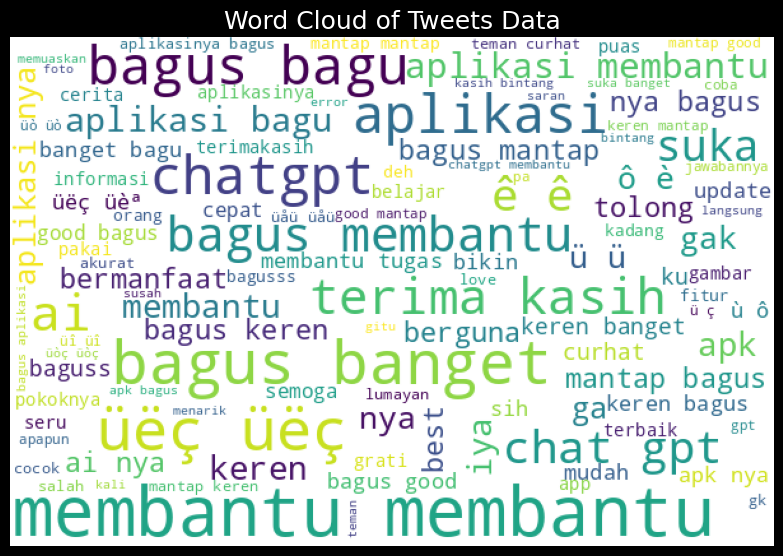

In [22]:
# Menginisialisasi variabel kosong 'list_words' untuk menampung semua kata dari teks yang telah dibersihkan.
list_words = ''

# Melakukan perulangan untuk setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Melakukan iterasi untuk setiap kata dalam tweet tersebut.
    for word in tweet:
        # Menambahkan kata ke variabel 'list_words' dengan spasi sebagai pemisah.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan ukuran tertentu dan latar belakang putih.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat plot dan sumbu untuk menampilkan hasil WordCloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menambahkan judul ke visualisasi WordCloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan garis grid pada grafik.
ax.grid(False)

# Menampilkan WordCloud di dalam plot.
ax.imshow((wordcloud))

# Menyesuaikan layout agar tampil lebih rapi.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu X dan Y.
ax.axis('off')

# Memunculkan visualisasi WordCloud.
plt.show()

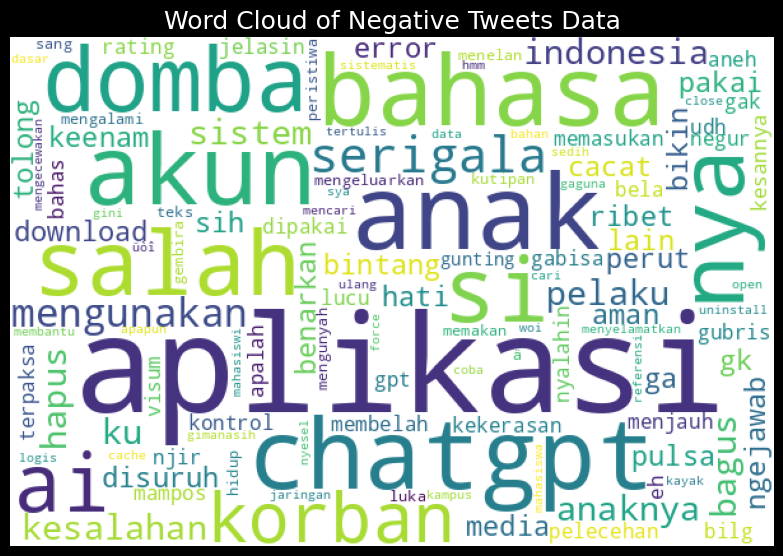

In [23]:
# Inisialisasi variabel kosong 'list_words' untuk menampung seluruh kata dari tweet negatif yang telah dibersihkan.
list_words = ''

# Melakukan loop untuk setiap data dalam kolom 'text_stopword' milik DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Loop untuk mengambil setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words' dengan spasi sebagai pemisah.
        list_words += ' ' + (word)

# Membuat visualisasi WordCloud dengan spesifikasi ukuran dan tampilan tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Menyiapkan canvas untuk menampilkan WordCloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Memberikan judul pada visualisasi.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan tampilan grid pada sumbu.
ax.grid(False)

# Menampilkan WordCloud di dalam plot.
ax.imshow(wordcloud)

# Menyesuaikan tampilan layout agar lebih rapi.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu X dan Y agar fokus pada WordCloud.
ax.axis('off')

# Menampilkan hasil visualisasi WordCloud ke layar.
plt.show()

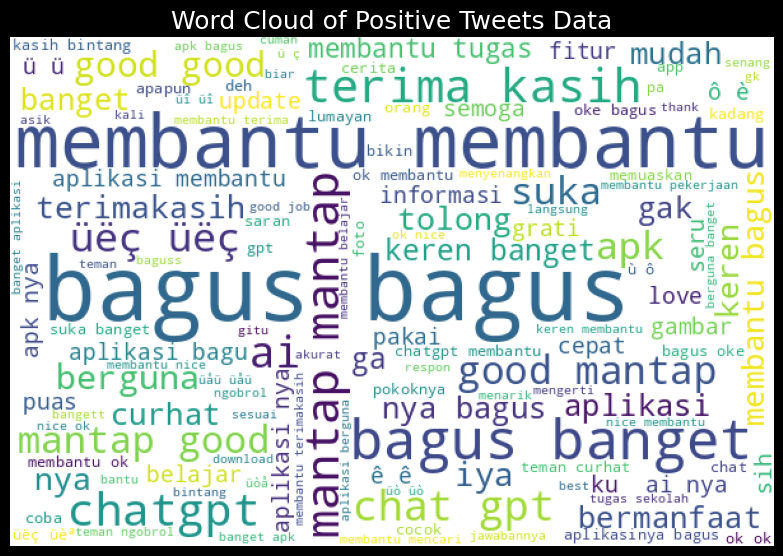

In [24]:
# Menginisialisasi variabel kosong 'list_words' untuk menampung seluruh kata dari tweet positif yang telah dibersihkan.
list_words = ''

# Melakukan iterasi pada setiap tweet di kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi setiap kata dalam tweet tersebut.
    for word in tweet:
        # Menambahkan kata ke dalam variabel 'list_words' dengan spasi sebagai pemisah.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan ukuran dan pengaturan tampilan tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Menyusun plot untuk menampilkan WordCloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menambahkan judul pada tampilan WordCloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Mematikan tampilan grid pada plot.
ax.grid(False)

# Menampilkan WordCloud di dalam plot.
ax.imshow(wordcloud)

# Menyesuaikan tata letak agar lebih rapi tanpa padding tambahan.
fig.tight_layout(pad=0)

# Menyembunyikan tampilan sumbu agar visualisasi lebih bersih.
ax.axis('off')

# Menampilkan hasil WordCloud.
plt.show()

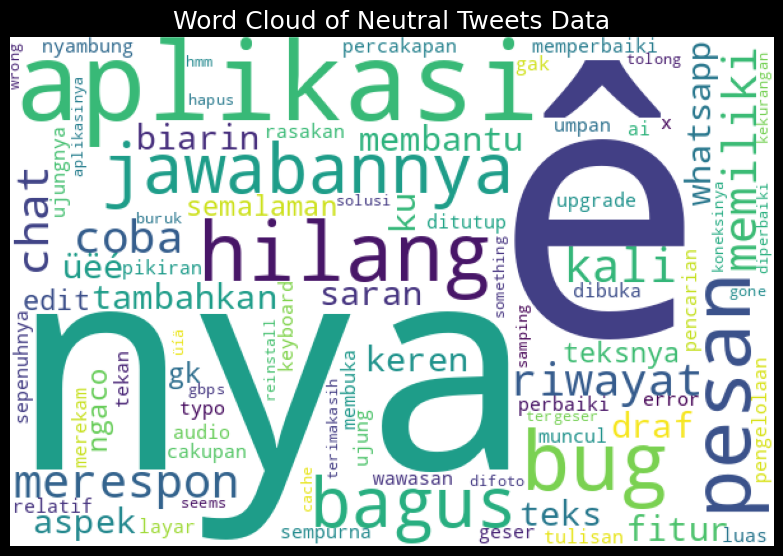

In [25]:
# Menginisialisasi variabel string kosong 'list_words' untuk menampung seluruh kata dari tweet netral yang telah dibersihkan dari stopword.
list_words = ''

# Melakukan iterasi terhadap setiap tweet netral dalam kolom 'text_stopword'.
for tweet in neutral_tweets['text_stopword']:
    for word in tweet:
        # Menambahkan kata ke dalam variabel 'list_words', dipisahkan dengan spasi.
        list_words += ' ' + word

# Membuat objek WordCloud dengan ukuran 600x400 piksel, latar belakang putih, dan ukuran font minimum 10.
# WordCloud ini akan divisualisasikan berdasarkan kata-kata yang telah digabungkan dalam 'list_words'.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Menyusun plot untuk menampilkan WordCloud.
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)  # Menambahkan judul
ax.grid(False)                                                  # Menonaktifkan grid
ax.imshow(wordcloud)                                            # Menampilkan WordCloud
fig.tight_layout(pad=0)                                         # Menyesuaikan tata letak
ax.axis('off')                                                  # Menyembunyikan sumbu
plt.show()                                                      # Menampilkan hasil visualisasi

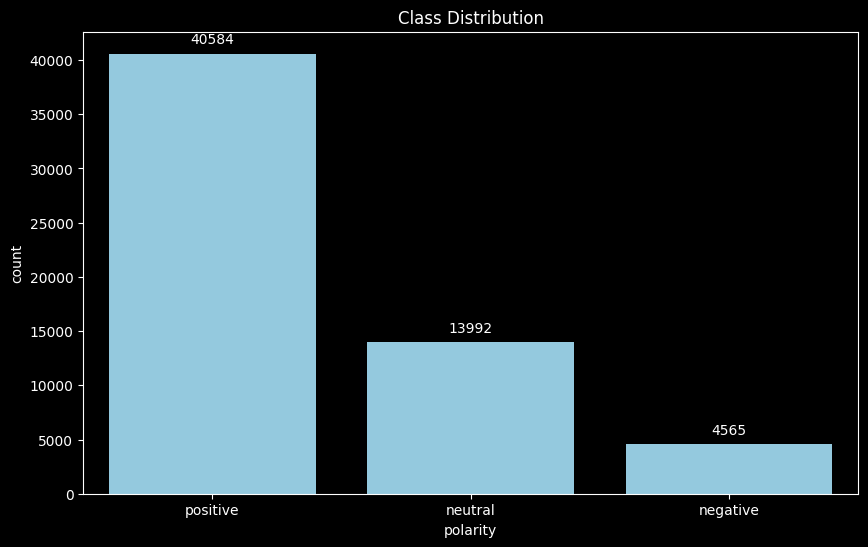

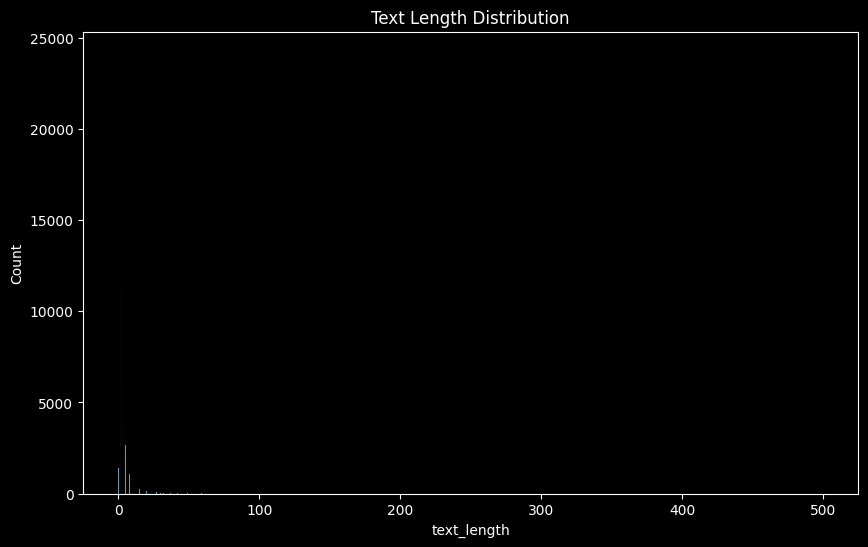

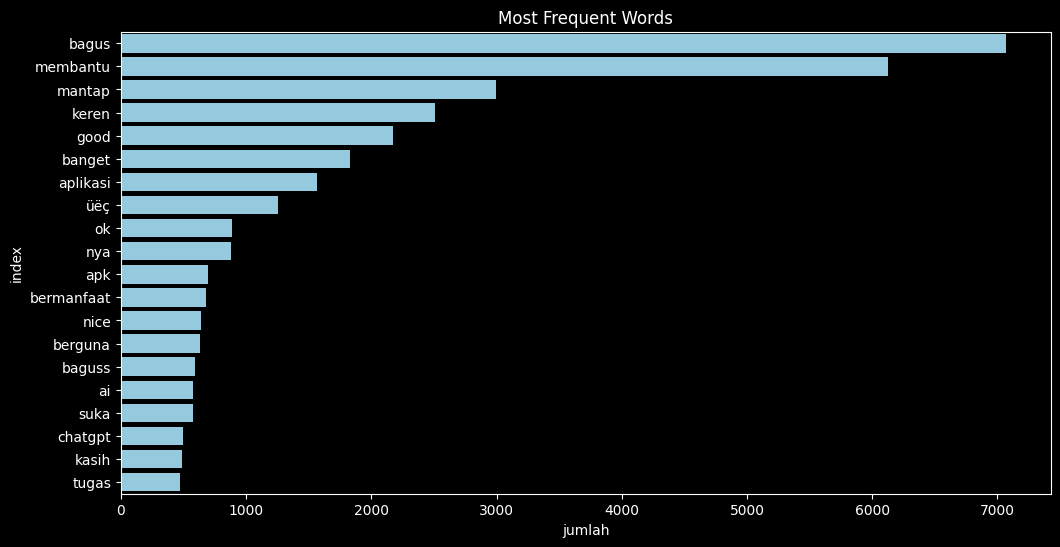

In [26]:
# Visualisasi distribusi jumlah tweet berdasarkan label sentimen
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df, color='skyblue')
plt.title('Class Distribution')

# Menambahkan label jumlah di atas setiap batang
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')

plt.show()

# Visualisasi distribusi panjang teks
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'], color='skyblue')
plt.title('Text Length Distribution')
plt.show()

# Visualisasi kata-kata yang paling sering muncul (TF-IDF)
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

sns.barplot(x='jumlah', y='index', data=tfidf_df, color='skyblue')
plt.title('Most Frequent Words')
plt.show()

## **Data Splitting**

In [27]:
# Menampilkan 2 baris pertama dari DataFrame 'clean_df'.
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,6f6c7e75-c845-47cf-a194-75d2280ca2db,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasinya udah bagus bangett bahkan terlalu sempurna disini valid 100% akurat, tapi cuma 2 masalahnya. Pertama, harusnya sediakan analisis video juga lewat ai entah YouTube,shorts video, reels dll. Dan yg Kedua, mengirim file tidak bisa berkapasitas tinggi harus rendah contoh : saya mengirim file 20 mb harus di Kompress jadi 3 mb jadi tolong di perbaiki lagi itu saja si kendala nya",5,624,1.2025.077,2025-03-29 12:41:19,NaN,NaN,1.2025.077,aplikasinya udah bagus bangett bahkan terlalu sempurna disini valid akurat tapi cuma masalahnya Pertama harusnya sediakan analisis video juga lewat ai entah YouTube shorts video reels dll Dan yg Kedua mengirim file tidak bisa berkapasitas tinggi harus rendah contoh saya mengirim file mb harus di Kompress jadi mb jadi tolong di perbaiki lagi itu saja si kendala nya,aplikasinya udah bagus bangett bahkan terlalu sempurna disini valid akurat tapi cuma masalahnya pertama harusnya sediakan analisis video juga lewat ai entah youtube shorts video reels dll dan yg kedua mengirim file tidak bisa berkapasitas tinggi harus rendah contoh saya mengirim file mb harus di kompress jadi mb jadi tolong di perbaiki lagi itu saja si kendala nya,aplikasinya sudah bagus bangett bahkan terlalu sempurna disini valid akurat tapi cuma masalahnya pertama harusnya sediakan analisis video juga lewat ai entah youtube shorts video reels dan lain-lain dan yang kedua mengirim file tidak bisa berkapasitas tinggi harus rendah contoh saya mengirim file mb harus di kompress jadi mb jadi tolong di perbaiki lagi itu saja si kendala nya,"[aplikasinya, sudah, bagus, bangett, bahkan, terlalu, sempurna, disini, valid, akurat, tapi, cuma, masalahnya, pertama, harusnya, sediakan, analisis, video, juga, lewat, ai, entah, youtube, shorts, video, reels, dan, lain-lain, dan, yang, kedua, mengirim, file, tidak, bisa, berkapasitas, tinggi, harus, rendah, contoh, saya, mengirim, file, mb, harus, di, kompress, jadi, mb, jadi, tolong, di, perbaiki, lagi, itu, saja, si, kendala, nya]","[aplikasinya, bagus, bangett, sempurna, valid, akurat, sediakan, analisis, video, ai, youtube, shorts, video, reels, lain-lain, mengirim, file, berkapasitas, rendah, contoh, mengirim, file, mb, kompress, mb, tolong, perbaiki, si, kendala, nya]",aplikasinya bagus bangett sempurna valid akurat sediakan analisis video ai youtube shorts video reels lain-lain mengirim file berkapasitas rendah contoh mengirim file mb kompress mb tolong perbaiki si kendala nya,5,positive,30
1,ef026234-dc01-46ad-ac7d-c39b210d4671,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Hasil visual matrix terlalu lama dan masih terbatas harus menunggu beberapa jam lagi untuk bisa produktif menghasilkan sketsa visual. Tapi untuk teks interaktif/ penjelasan naratif aplikasinya keren! Saya butuh alat dan sarana yang instan untuk mempermudah kehidupan dunia modern yang semakin cepat dan kompleks. Ayo perbaiki apa yang masih kurang min.,3,3,1.2025.084,2025-04-09 00:10:22,NaN,NaN,1.2025.084,Hasil visual matrix terlalu lama dan masih terbatas harus menunggu beberapa jam lagi untuk bisa produktif menghasilkan sketsa visual Tapi untuk teks interaktif penjelasan naratif aplikasinya keren Saya butuh alat dan sarana yang instan untuk mempermudah kehidupan dunia modern yang semakin cepat dan kompleks Ayo perbaiki apa yang masih kurang min,hasil visual matrix terlalu lama dan masih terbatas harus menunggu beberapa jam lagi untuk bisa produktif menghasilkan sketsa visual tapi untuk teks interaktif penjelasan nara

In [28]:
# Memisahkan data menjadi dua bagian: fitur (X) dan label (y).
# X berisi teks tweet yang telah dibersihkan, yaitu kolom 'text_akhir'.
# y berisi label sentimen dari masing-masing tweet, yaitu kolom 'polarity'.
X = clean_df['text_akhir']
y = clean_df['polarity']

In [29]:
# Mengekstraksi fitur dari data teks menggunakan TF-IDF Vectorizer.
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [30]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,ai,ajak,akun,akurat,amazing,anak,and,apapun,apk,apknya,...,üíø,üî,üò,üòä,üòå,üòç,üòé,üòò,üóø,üôè
0,0.205775,0.0,0.0,0.284089,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.26149
3,0.381304,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.387980,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.139281,0.0,...,0.0,0.0,0.190223,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59136,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
59137,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
59138,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
59139,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [31]:
# Buat vectorizer BoW
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [32]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## **Pemodelan Naive Bayes**

In [33]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8745984105512343
Naive Bayes - accuracy_test: 0.8671908022656184


## **Random Forest**

In [34]:
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9561422049374366
Random Forest - accuracy_test: 0.9147011581705977


## **Logistic Regression**

In [35]:
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9201471085559689
Logistic Regression - accuracy_test: 0.9187589821624821


## **Decision Tree**

In [36]:
# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9561422049374366
Decision Tree - accuracy_test: 0.9019359201961281


In [37]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.867191
1        Random Forest       0.914701
2  Logistic Regression       0.918759
3        Decision Tree       0.901936


In [38]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                 Model  Accuracy Test
2  Logistic Regression       0.918759
1        Random Forest       0.914701
3        Decision Tree       0.901936
0          Naive Bayes       0.867191


#### **Analisis Performa Model**

1. **Logistic Regression**  
   Logistic Regression menunjukkan performa terbaik dengan akurasi sebesar **91.87%**, mengungguli model lainnya. Hal ini menunjukkan bahwa data yang digunakan memiliki karakteristik linier yang cukup baik sehingga model ini mampu memisahkan kelas dengan akurat. Logistic Regression juga cenderung lebih sederhana dan cepat dilatih, menjadikannya pilihan efisien dan andal untuk kasus ini.

2. **Random Forest**  
   Dengan akurasi **91.47%**, Random Forest menduduki peringkat kedua. Sebagai model ensemble berbasis Decision Tree, Random Forest cukup kuat dalam menangani data yang kompleks dan non-linier. Meskipun tidak seakurat Logistic Regression dalam kasus ini, selisihnya sangat kecil, menandakan performa yang tetap kompetitif dan stabil.

3. **Decision Tree**  
   Model Decision Tree memiliki akurasi **90.19%**, yang menunjukkan kinerja yang cukup baik namun masih lebih rendah dibandingkan dengan model ensemble-nya (Random Forest). Salah satu kekurangan dari Decision Tree adalah cenderung overfitting jika tidak dilakukan pruning atau pengaturan parameter yang tepat.

4. **Naive Bayes**  
   Model ini menunjukkan akurasi terendah sebesar **86.71%**. Meski demikian, Naive Bayes masih cukup baik untuk baseline model karena kecepatan dan efisiensinya. Namun, asumsi independensi antar fitur yang digunakan dalam algoritma ini tampaknya tidak sepenuhnya sesuai dengan karakteristik data aplikasi ChatGPT, yang menyebabkan performa kurang optimal.

In [39]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# 1. Membersihkan karakter tidak penting (sama dengan 'text_clean')
kalimat_clean = preprocess_text(kalimat_baru)

# 2. Case folding (sama dengan 'text_casefoldingText')
kalimat_casefold = kalimat_clean.lower()

# 3. Ganti slang word (sama dengan 'text_slangwords')
kalimat_slang = replace_slang(kalimat_casefold)

# 4. Tokenisasi (sama dengan 'text_tokenizingText')
kalimat_token = word_tokenize(kalimat_slang)

# 5. Hapus stopword (sama dengan 'text_stopword')
stop_words = set(stopwords.words('indonesian'))
kalimat_stopword = [word for word in kalimat_token if word not in stop_words]

# 6. Gabungkan kembali menjadi kalimat akhir (sama dengan 'text_akhir')
kalimat_final = ' '.join(kalimat_stopword)

# Transform ke TF-IDF dan prediksi
X_kalimat_baru = tfidf.transform([kalimat_final])
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Tampilkan hasil
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 'neutral':
    print("Sentimen kalimat baru adalah NETRAL.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: Dengan adanya ChatGPT sangat membantu saya
Sentimen kalimat baru adalah POSITIF.
